## Task 0. Generate randomly 2-dimensional training / test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
train1 = np.random.multivariate_normal([1,1], [[1,0],[0,1]], 50)
train2 = np.random.multivariate_normal([-1,-1], [[1,0],[0,1]], 50)
train = np.vstack([train1, train2])
train_label = np.vstack([np.array([[1,0]]*50), np.array([[0,1]]*50)])

test1 = np.random.multivariate_normal([1,1], [[1,0],[0,1]], 50)
test2 = np.random.multivariate_normal([-1,-1], [[1,0],[0,1]], 50)
test = np.vstack([test1, test2])
test_label = np.vstack([np.array([[1,0]]*50), np.array([[0,1]]*50)])

In [2]:
def shuffle(dataset, label):             #데이터 셋 랜덤하게 shuffle
    s = np.arange(dataset.shape[0])
    np.random.shuffle(s)
    return dataset[s], label[s]

train, train_label = shuffle(train, train_label)
test, test_label = shuffle(test, test_label)

Text(0.5, 0, 'Test Dataset')

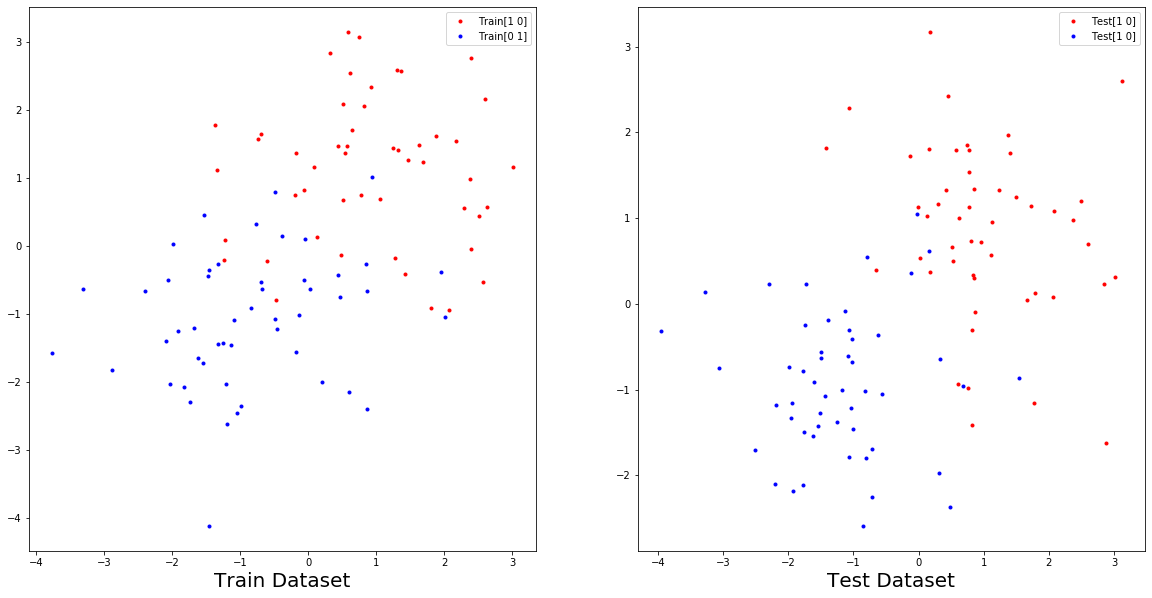

In [3]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(train1[:, 0], train1[:, 1], '.', c='red', label='Train[1 0]')
plt.plot(train2[:, 0], train2[:, 1], '.', c='blue', label='Train[0 1]')
plt.xlabel('Train Dataset', fontsize=20)

plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.plot(test1[:, 0], test1[:, 1], '.', c='red', label='Test[1 0]')
plt.plot(test2[:, 0], test2[:, 1], '.', c='blue', label='Test[1 0]')
plt.legend(loc='upper right')
plt.xlabel('Test Dataset', fontsize=20)

## Task 1. Build the fully connected layer model.

In [4]:
class JHNet:
    def __init__(self, input_size, hidden_layer1, hidden_layer2, output_size, learning_rate = 0.0001):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = np.random.normal(0, 0.001, (input_size,hidden_layer1))
        self.params['W2'] = np.random.normal(0, 0.001, (hidden_layer1,hidden_layer2))
        self.params['W3'] = np.random.normal(0, 0.001, (hidden_layer2,output_size))
        self.lr = learning_rate
        
    def relu(self, x):
        return np.maximum(0,x)
    
    '''
    def softmax(x):
        new_x=[]
        for i in x:
            e_x = np.exp(i - np.max(i))
            new_x.append(e_x / e_x.sum())
        return np.array(new_x)
    '''

    def forward(self, x):
        out = np.dot(x, self.params['W1'])
        out - self.relu(out)
        out = np.dot(out, self.params['W2'])
        out = self.relu(out)
        out = np.dot(out, self.params['W3'])
        return out
    
    def accuracy(self, x, label):
        return 100 * np.mean(np.equal(np.argmax(self.forward(x),1),np.argmax(label,1)))
    
    def MSELoss(self, x, label):
        return ((label - self.forward(x))**2).mean()
    
    
    def backward(self, x, label):
        w1 = self.params['W1']
        w2 = self.params['W2']
        w3 = self.params['W3']
        
        H1 = np.dot(x, w1)
        out_H1 = self.relu(H1)
        H2 = np.dot(out_H1, w2)
        out_H2 = self.relu(H2)
        target = np.dot(out_H2, w3)
        
        dW3 = np.dot(out_H2.T,(2*(self.forward(x) - label)))
        
        dw2 = np.dot((2*(target - train_label)),w3.T)
        dw2 = self.relu_grad(dw2)
        dW2 = np.dot(dw2.T, out_H1)
        
        dw1 = np.dot((2*(target - train_label)),w3.T)
        dw1 = self.relu_grad(dw1)
        dw1 = np.dot(dw1, w2)
        dw1 = self.relu_grad(dw1)
        dW1 = np.dot(train.T, dw1)

        self.params['W1'] -= self.lr *dW1
        self.params['W2'] -= self.lr *dW2
        self.params['W3'] -= self.lr *dW3
        
    def relu_grad(self,x):
        mask = (x>0)
        return mask * x
        
        
  #  def backward(self, label, target):
        

In [40]:
net = JHNet(input_size=2, hidden_layer1=10, hidden_layer2=10, output_size=2, learning_rate = 0.5)
test_first_target= net.forward(test)

## Task 2. Implement Forward Pass of the Network

In [41]:
print('Test dataset Accuracy = %d%%' %net.accuracy(test, test_label))

Test dataset Accuracy = 30%


## Task 3. Implement Backward Pass of the Network

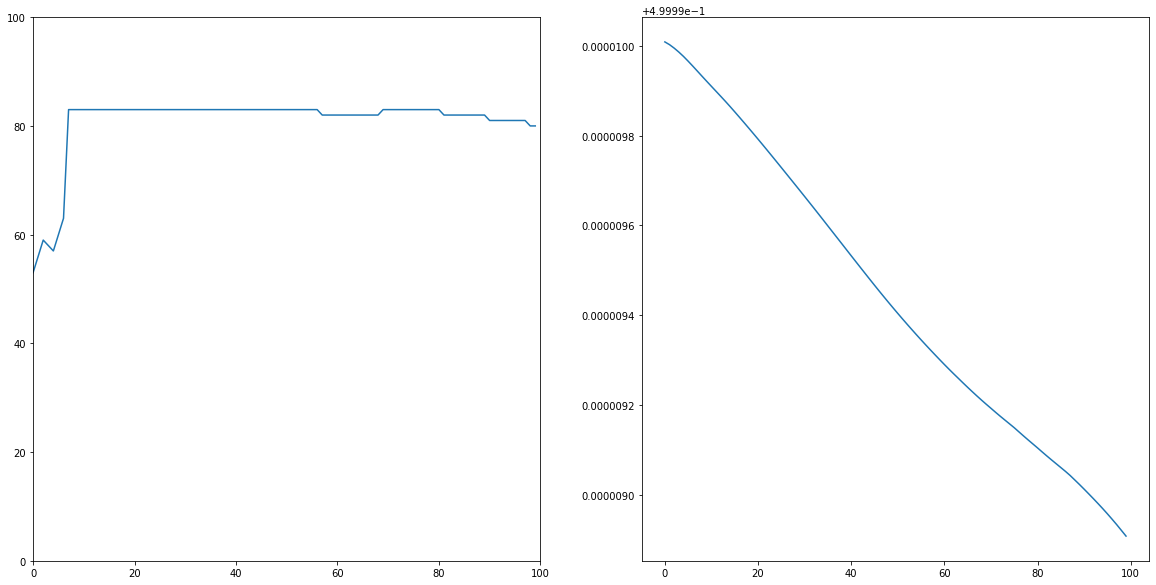

In [42]:
train_acc = []
loss = []
epoch = 100

for i in range(epoch):
    net.backward(train,train_label)
    train_acc.append(net.accuracy(train, train_label))
    loss.append(net.MSELoss(train, train_label))
    
#    print('Test dataset Accuracy = %d%%' %net.accuracy(test, test_label))
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(train_acc)
plt.axis([0,100,0,100])

plt.subplot(1,2,2)
plt.plot(loss)

In [43]:
def result(dataset, label):
    train_0 = []
    train_1 = []
    for num, data in enumerate(dataset):
        if np.argmax(label,1)[num] == 0:
            train_0.append(data)
        else:
            train_1.append(data)
    train_0 = np.array(train_0)
    train_1 = np.array(train_1)
    return train_0, train_1

before_learning0, before_learning1 = result(test, test_first_target)
after_learning0, after_learning1 = result(test, net.forward(test))

Text(0.5, 0, 'after learning')

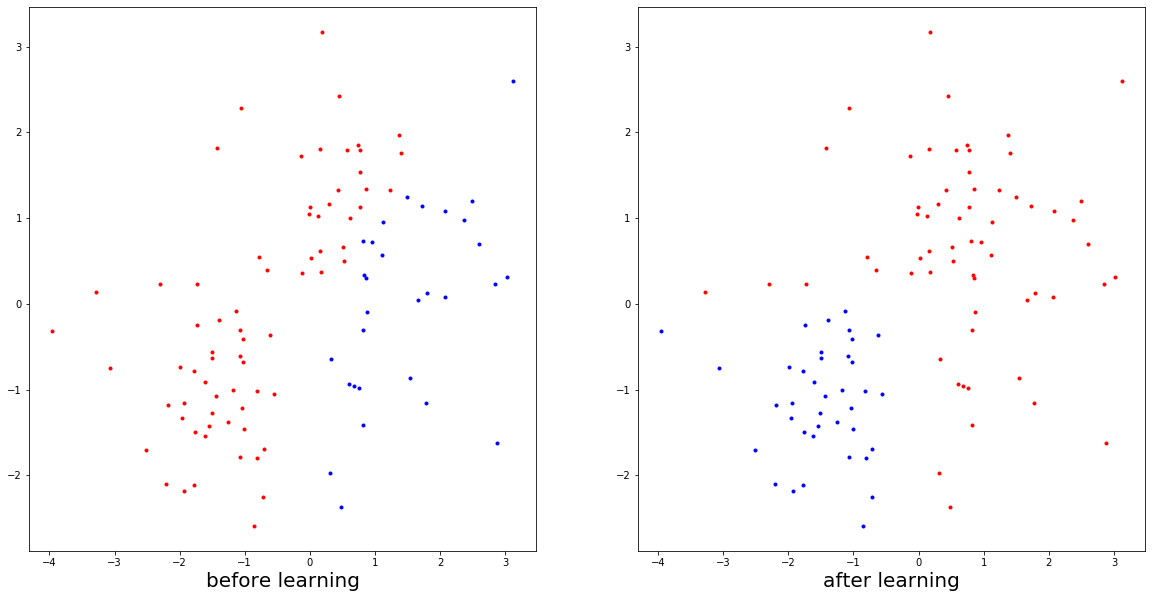

In [44]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(before_learning0[:, 0], before_learning0[:, 1], '.', c='red', label='Train[1 0]')
plt.plot(before_learning1[:, 0], before_learning1[:, 1], '.', c='blue', label='Train[0 1]')
plt.xlabel('before learning', fontsize=20)

plt.subplot(1,2,2)
plt.plot(after_learning0[:, 0], after_learning0[:, 1], '.', c='red', label='Train[1 0]')
plt.plot(after_learning1[:, 0], after_learning1[:, 1], '.', c='blue', label='Train[0 1]')
plt.xlabel('after learning', fontsize=20)